In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
login_df = pd.read_json('logins.json')

In [3]:
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
login_df.sort_values('login_time',inplace=True)

In [6]:
login_df.reset_index(inplace=True,drop=True)
login_df.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [7]:
login_df.iloc[-1]

login_time   1970-04-13 18:57:38
Name: 93141, dtype: datetime64[ns]

In [17]:
login_df['count'] = 1

login_df.index = login_df['login_time']
login_df.drop('login_time',axis=1,inplace=True)

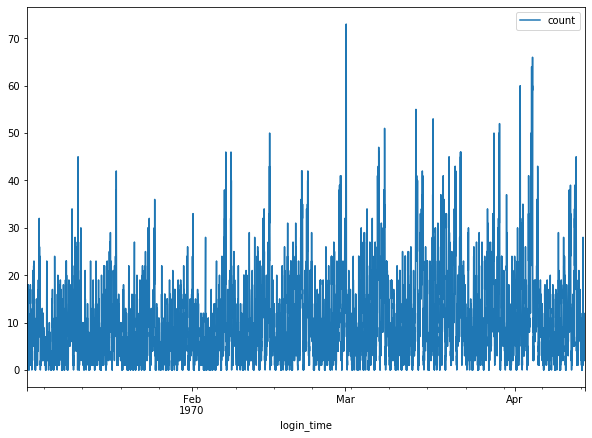

In [20]:
_15min_count = login_df.resample('15T').sum()
_15min_count.plot(kind='line',figsize=(10,7))

 The above line plot shows the frequency of logins for every 15 min interval over the 4 months

In [21]:
_15min_count.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


Average no. of users that logged in, in 15 min interval was 7 for the entire period

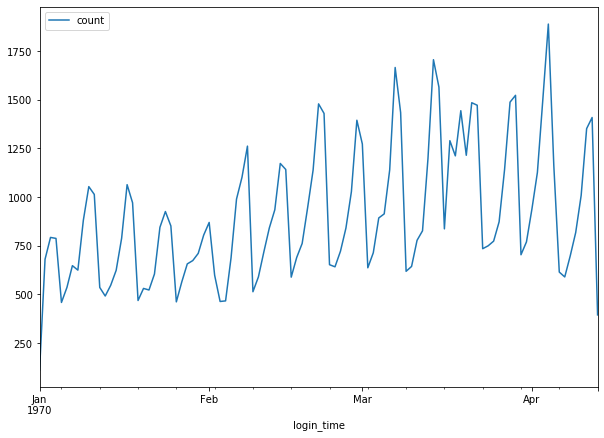

In [22]:
daily_count = login_df.resample('1d').sum()
daily_count.plot(kind='line',figsize=(10,7))

The no. of daily users have been steadily increasing over the months

In [27]:
df_jan = daily_count['1970-01-01':'1970-01-31']
df_feb = daily_count['1970-02-01':'1970-02-28']
df_mar = daily_count['1970-03-01':'1970-03-31']
df_apr = daily_count['1970-04-01':'1970-04-13']

Dividing the data into the respective months

<Figure size 720x504 with 0 Axes>

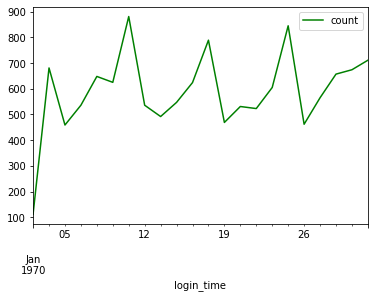

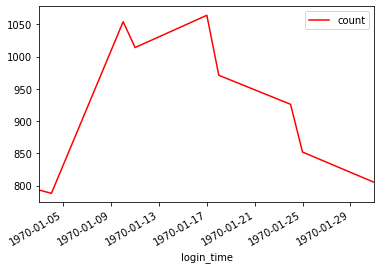

In [49]:
weekday = df_jan[df_jan.index.dayofweek < 5]
weekend = df_jan[df_jan.index.dayofweek >= 5]
plt.figure(figsize=(10,7))
weekday.plot(kind='line',color='g')
weekend.plot(kind='line',color='r')

The above line plot shows the comparison of the no. of users that logged in during the weekday and weekend. It can be clearly observed that the number of users are far more during weekends(plot in red). 

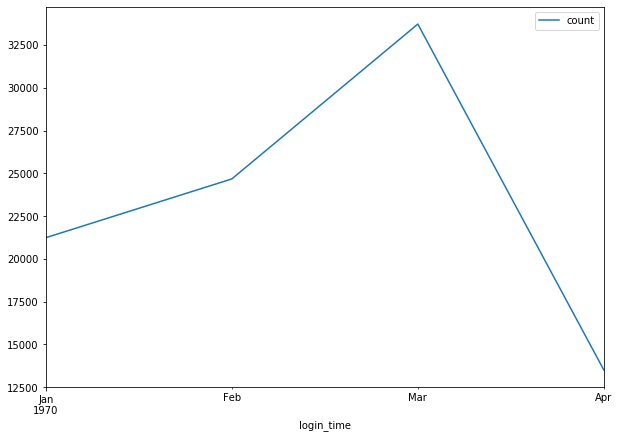

In [23]:
monthly_count = login_df.resample('1m').sum()
monthly_count.plot(kind='line',figsize=(10,7))

The no. of users have also grown over the course of 3 months. Plot declines because it has data only for the first 13 days in the month of april.